In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Importing the datasets

In [2]:
df_cars = pd.read_csv("//Users//swatishrivastava//Desktop//used_cars_data.csv")

### Checking out the rows

In [3]:
df_cars.shape

(7253, 14)

### Checking out the datasets

In [4]:
df_cars.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


### Getting the basic information

In [5]:
df_cars.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


### Missing values

In [6]:
df_cars.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [7]:
# Percentages of missing values

(df_cars.isnull().sum()/(len(df_cars)))*100

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64

In [8]:
df_cars.drop(columns="New_Price", inplace=True)

In [9]:
df_cars.dropna(inplace=True)

The percentage of missing values for the columns New_Price and Price is ~86% and ~17%, respectively.

In [10]:
df_cars.isnull().sum()

S.No.                0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [11]:
# All the missing values are fixed

### Data Reduction

##### Some columns or variables can be dropped if they do not add any value to our analysis


In [12]:
# Removing the S.no column

df_cars.drop('S.No.', axis=1, inplace=True)


### Feature Enginnering

We start our Feature engineering as we need to add some columns required for our analysis

In [13]:
from datetime import date

In [14]:
date.today().year

2023

In [15]:
df_cars['car_Age'] = date.today().year - df_cars["Year"]

In [16]:
df_cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,13
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,8
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,12
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,11
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,10


In [17]:
# Since name of the car is not a great contributor in our analysis. We can extract the brand name of the car and model
# name from the columns.

In [18]:
df_cars["Brand"] = df_cars["Name"].str.split().str.get(0)

In [19]:
df_cars["Model"] = df_cars['Name'].str.split().str.get(1) + df_cars["Name"].str.split().str.get(2)

In [20]:
df_cars[["Name", "Brand", "Model"]]

,Name,Brand,Model
0,Maruti Wagon R LXI CNG,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta1.6
2,Honda Jazz V,Honda,JazzV
3,Maruti Ertiga VDI,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4New
...,...,...,...
6014,Maruti Swift VDI,Maruti,SwiftVDI
6015,Hyundai Xcent 1.1 CRDi S,Hyundai,Xcent1.1
6016,Mahindra Xylo D4 BSIV,Mahindra,XyloD4
6017,Maruti Wagon R VXI,Maruti,WagonR


### Data cleaning/ Wrangling

In [21]:
df_cars["Mileage"]

0       26.6 km/kg
1       19.67 kmpl
2        18.2 kmpl
3       20.77 kmpl
4        15.2 kmpl
           ...    
6014     28.4 kmpl
6015     24.4 kmpl
6016     14.0 kmpl
6017     18.9 kmpl
6018    25.44 kmpl
Name: Mileage, Length: 5975, dtype: object

In [22]:
df_cars["Mileage"] = df_cars["Mileage"].str.rstrip(" kmpl")
df_cars["Mileage"] = df_cars["Mileage"].str.rstrip(" km/g")

In [23]:
df_cars["Mileage"]

0        26.6
1       19.67
2        18.2
3       20.77
4        15.2
        ...  
6014     28.4
6015     24.4
6016     14.0
6017     18.9
6018    25.44
Name: Mileage, Length: 5975, dtype: object

In [24]:
df_cars["Engine"] = df_cars["Engine"].str.rstrip("CC")

In [25]:
df_cars["Engine"]

0        998 
1       1582 
2       1199 
3       1248 
4       1968 
        ...  
6014    1248 
6015    1120 
6016    2498 
6017     998 
6018     936 
Name: Engine, Length: 5975, dtype: object

In [26]:
df_cars["Power"]

0       58.16 bhp
1       126.2 bhp
2        88.7 bhp
3       88.76 bhp
4       140.8 bhp
          ...    
6014       74 bhp
6015       71 bhp
6016      112 bhp
6017     67.1 bhp
6018     57.6 bhp
Name: Power, Length: 5975, dtype: object

In [27]:
df_cars["Power"] = df_cars["Power"].str.rstrip("bhp")

In [28]:
df_cars["Power"]

0       58.16 
1       126.2 
2        88.7 
3       88.76 
4       140.8 
         ...  
6014       74 
6015       71 
6016      112 
6017     67.1 
6018     57.6 
Name: Power, Length: 5975, dtype: object

In [29]:
print(df_cars.Brand.unique())

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini']


In [30]:
print(df_cars.Brand.nunique())

31


In [31]:
# As we can see there's a spelling mistake in the dataset so we correct them

In [32]:
df_cars["Brand"].replace({"ISUZU": "Isuzu", "Mini": "Mini Cooper","Land":"Land Rover"}, inplace=True)

#### Fixing the data types

In [33]:
df_cars['Mileage'] = pd.to_numeric(df_cars['Mileage'],errors = 'coerce')

In [34]:
df_cars['Power'] = pd.to_numeric(df_cars['Power'],errors = 'coerce')

In [35]:
df_cars["Engine"]=df_cars["Engine"].astype(int)

In [36]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   float64
 8   Engine             5975 non-null   int64  
 9   Power              5872 non-null   float64
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
 12  car_Age            5975 non-null   int64  
 13  Brand              5975 non-null   object 
 14  Model              5975 non-null   object 
dtypes: float64(4), int64(4), object(7)
memory usage: 746.9+ KB


### Exploratory Data Analysis

### Statistical Summary

In [38]:
df_cars.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,5975.0,2013.386778,3.247238,1998.00,2012.0,2014.00,2016.00,2019.00
Kilometers_Driven,5975.0,58674.314979,91558.514361,171.00,33908.0,53000.00,73000.00,6500000.00
Mileage,5975.0,18.179408,4.521801,0.00,15.2,18.16,21.10,33.54
Engine,5975.0,1621.606695,601.036987,624.00,1198.0,1493.00,1984.00,5998.00
Power,5872.0,113.276894,53.881892,34.20,75.0,97.70,138.10,560.00
Seats,5975.0,5.278828,0.808959,0.00,5.0,5.00,5.00,10.00
Price,5975.0,9.501647,11.205736,0.44,3.5,5.65,9.95,160.00
car_Age,5975.0,9.613222,3.247238,4.00,7.0,9.00,11.00,25.00


### Seperating the numerical and categorical column

In [39]:
cat_cols=df_cars.select_dtypes(include=['object']).columns
num_cols = df_cars.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand',
       'Model'],
      dtype='object')
Numerical Variables:
['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price', 'car_Age']


### Univariate Analysis

###### Univariate analysis can be done for both Categorical and Numerical variables.

###### Categorical variables can be visualized using a Count plot, Bar Chart, Pie Plot, etc.

###### Numerical Variables can be visualized using Histogram, Box Plot, Density Plot, etc.

Year
Skew : -0.84


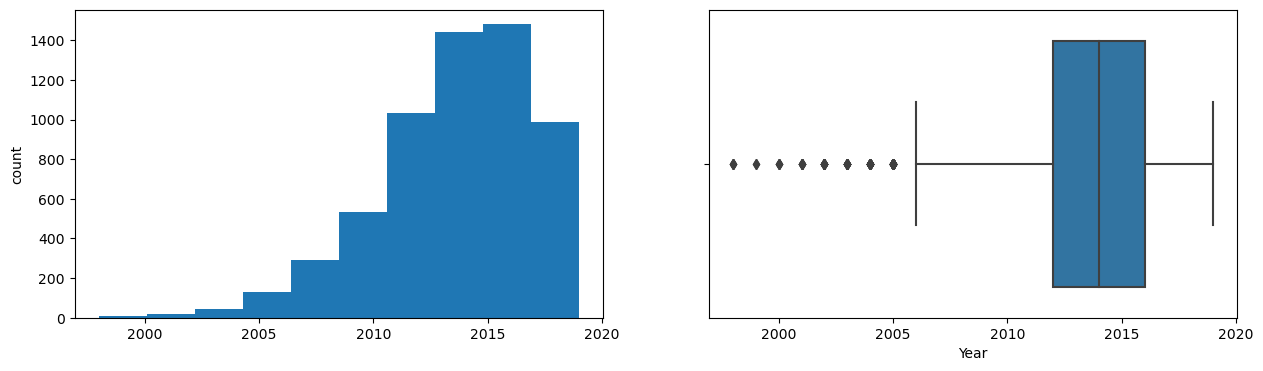

Kilometers_Driven
Skew : 58.6


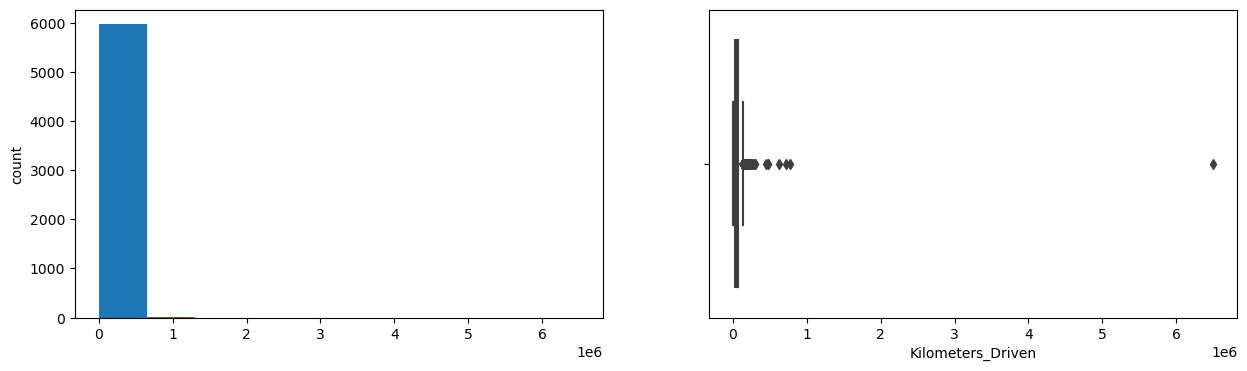

Mileage
Skew : -0.35


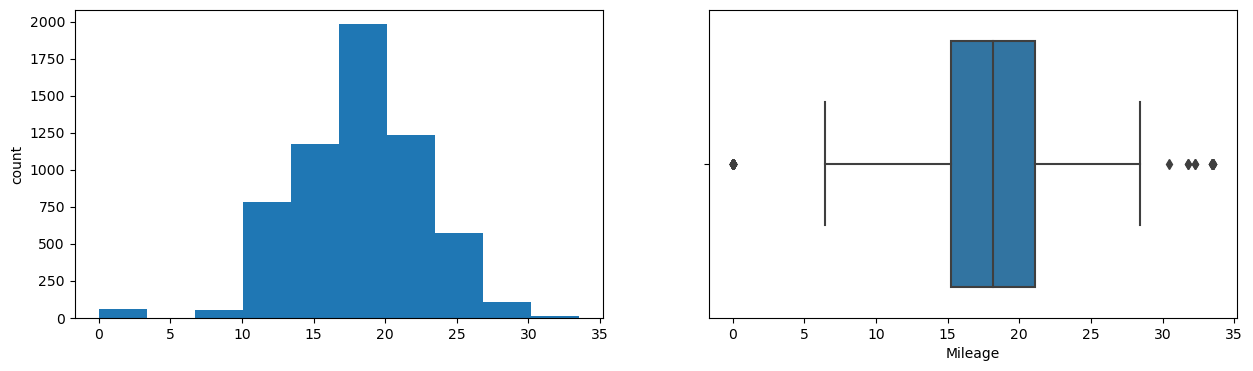

Engine
Skew : 1.43


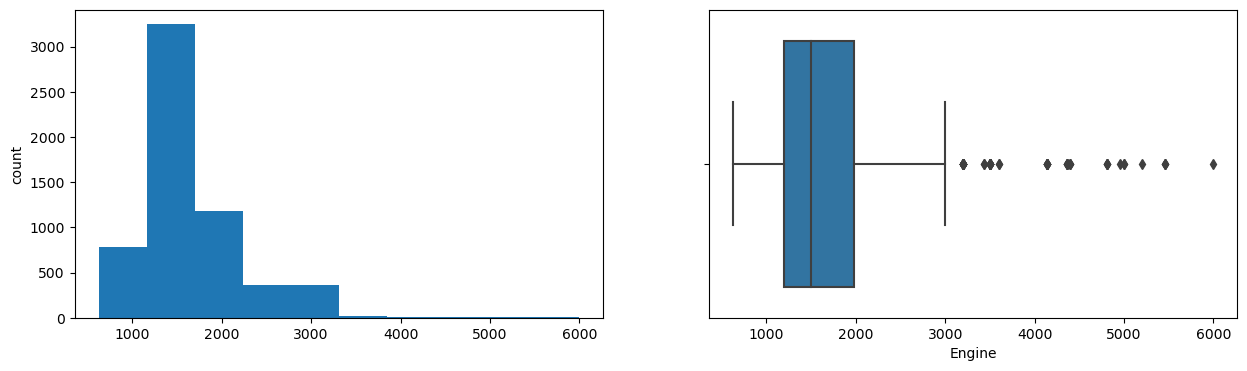

Power
Skew : 1.92


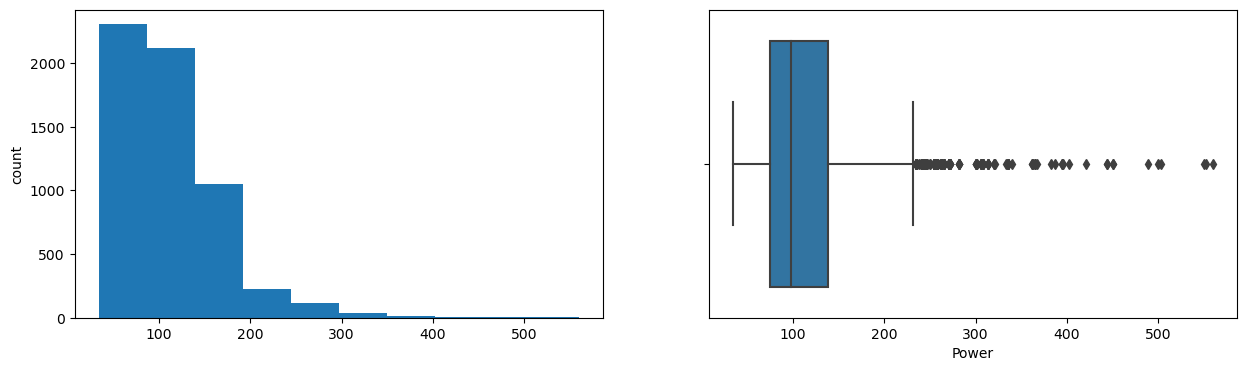

Seats
Skew : 1.84


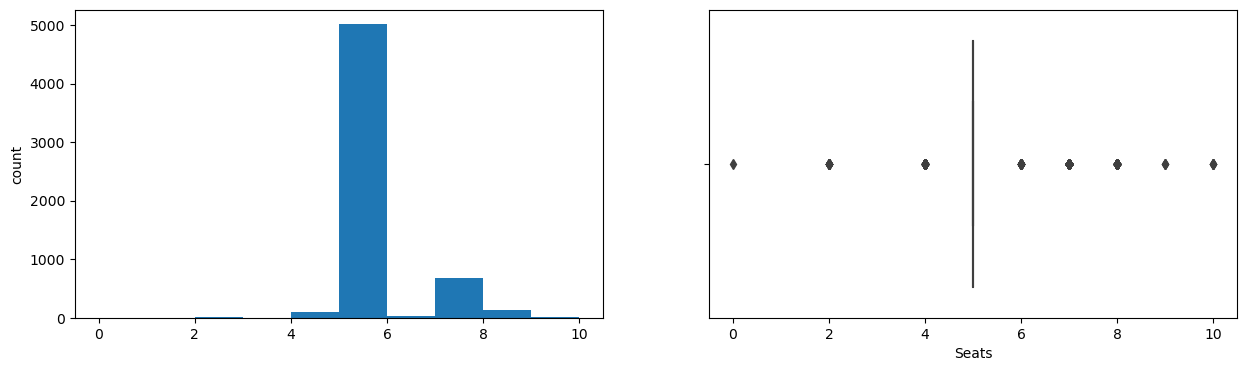

Price
Skew : 3.33


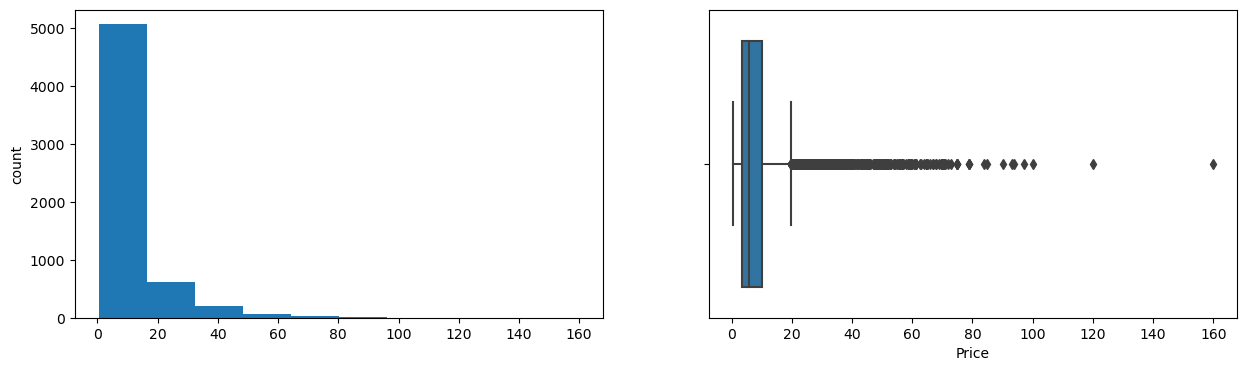

car_Age
Skew : 0.84


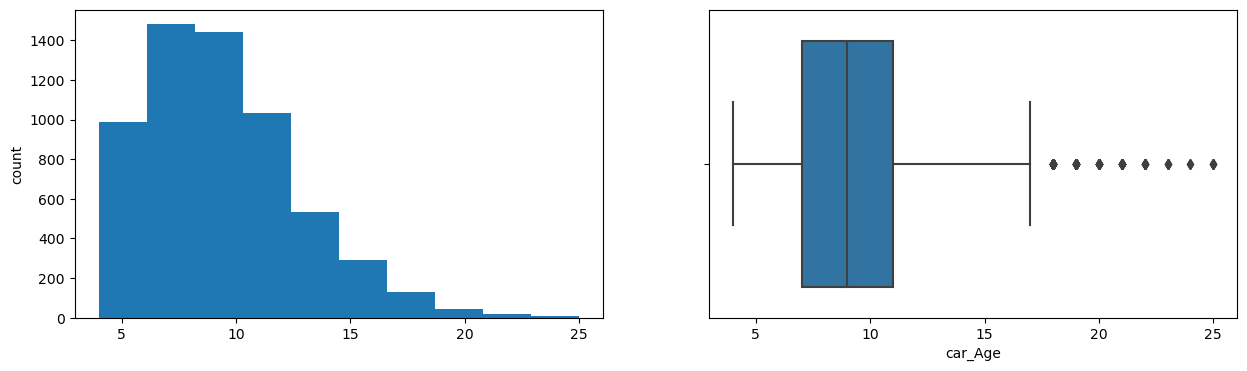

In [44]:
for i in num_cols:
    print(i)
    print('Skew :', round(df_cars[i].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df_cars[i].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df_cars[i])
    plt.show()

In [45]:
#### categorical variables are being visualized using a count plot. Categorical variables provide the pattern of factors 
#### influencing car price

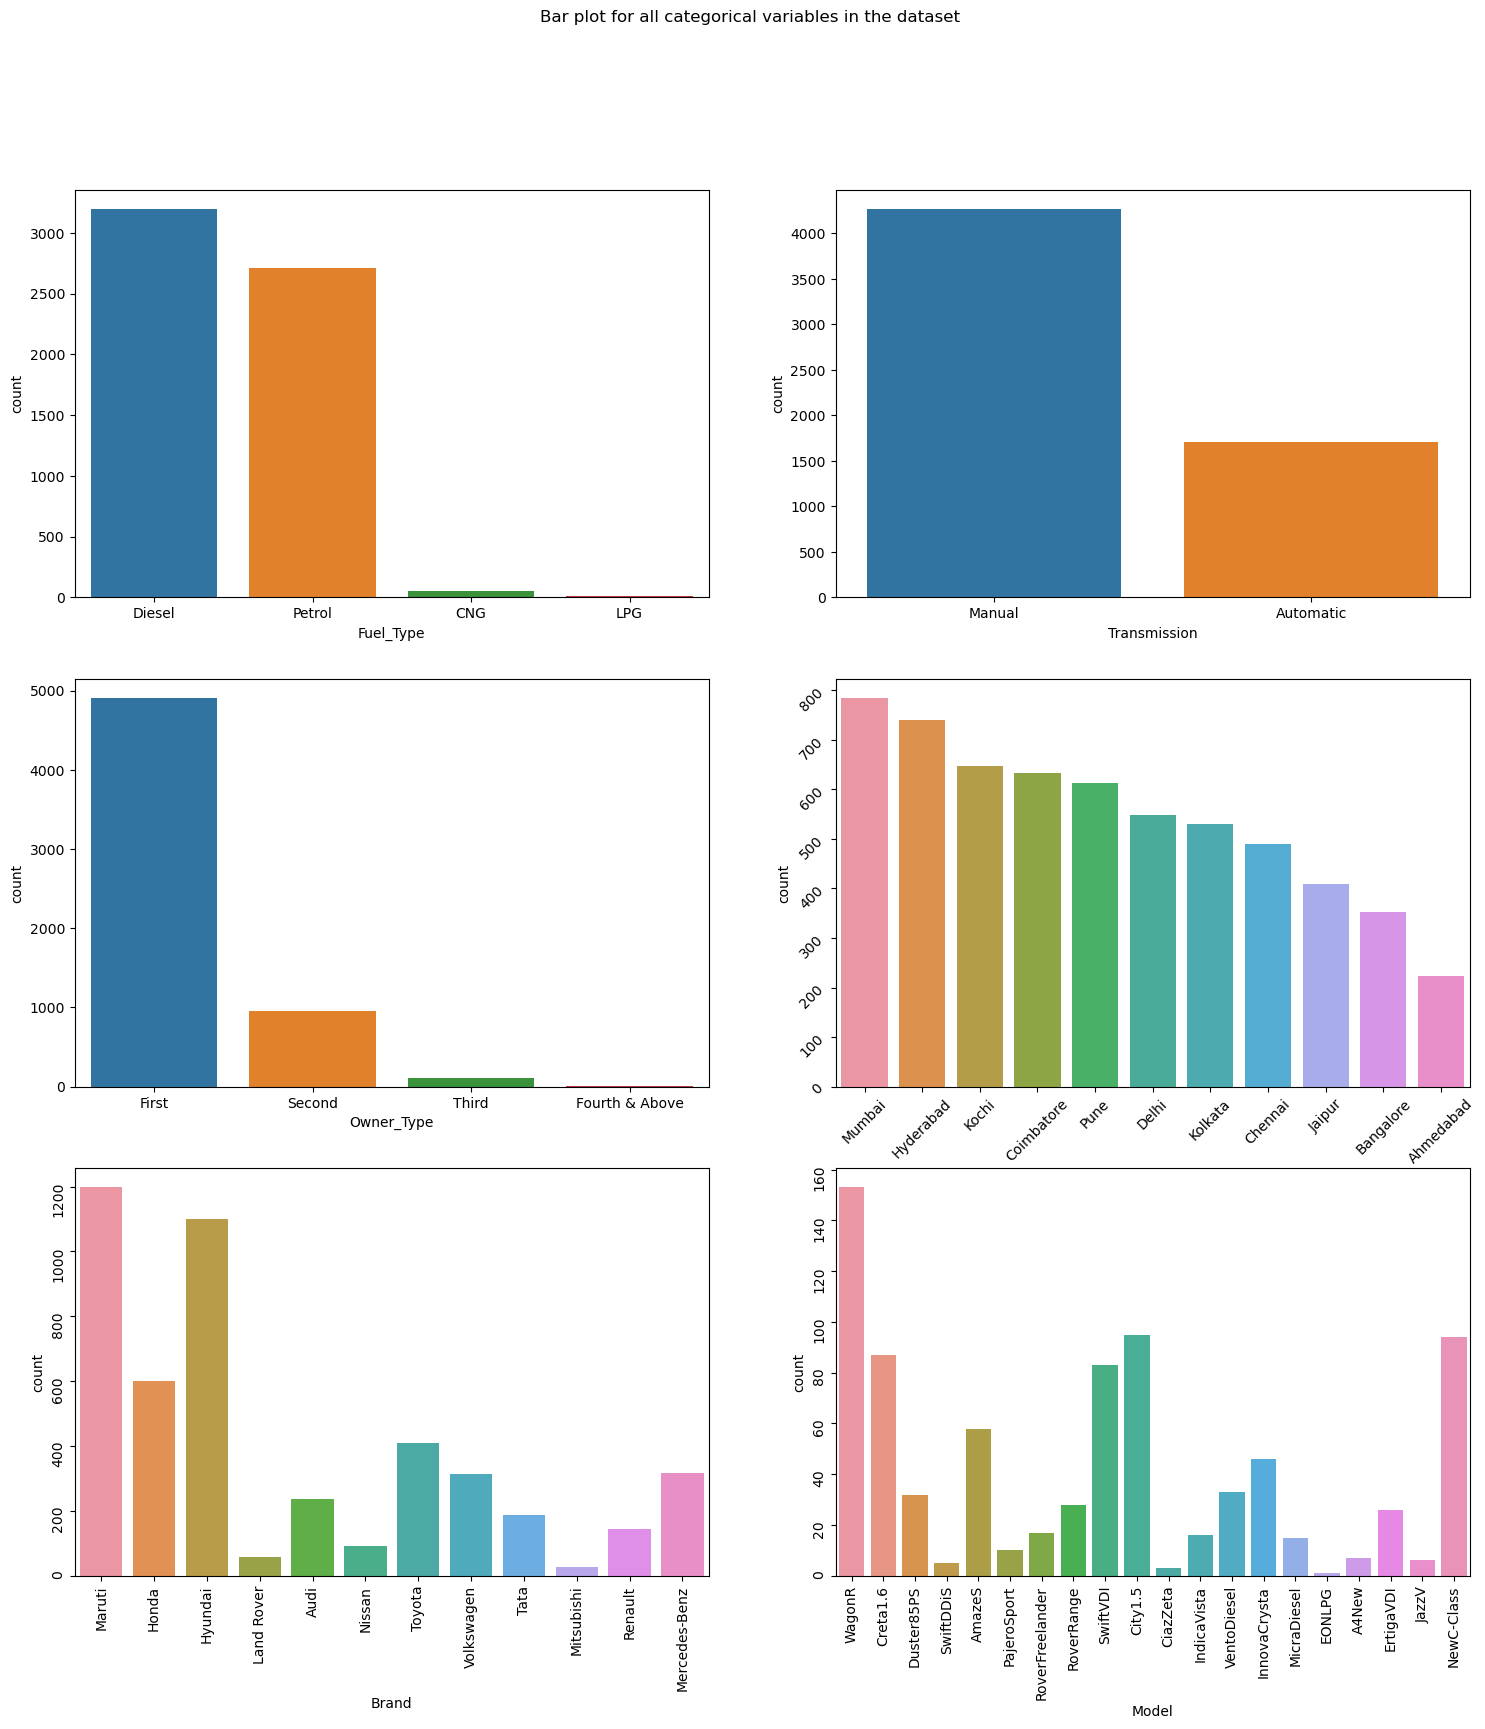

In [85]:
fig, axes = plt.subplots(3, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'Fuel_Type', data = df_cars, 
              order = df_cars['Fuel_Type'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'Transmission', data = df_cars, 
              order = df_cars['Transmission'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'Owner_Type', data = df_cars, 
              order = df_cars['Owner_Type'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'Location', data = df_cars, 
              order = df_cars['Location'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'Brand', data = df_cars, 
              order = df_cars['Brand'].head(20).value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'Model', data = df_cars, 
              order = df_cars['Model'].head(20).value_counts().index);
axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);


### Data Transformation

In [63]:
# Function for log transformation of the column
def log_transform(df_cars,col):
    for colname in col:
        if (df_cars[colname] == 1.0).all():
            df_cars[colname + '_log'] = np.log(df_cars[colname]+1)
        else:
            df_cars[colname + '_log'] = np.log(df_cars[colname])
    df_cars_cars.info()

In [66]:
log_transform(df_cars,['Kilometers_Driven','Price'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   5975 non-null   object 
 1   Location               5975 non-null   object 
 2   Year                   5975 non-null   int64  
 3   Kilometers_Driven      5975 non-null   int64  
 4   Fuel_Type              5975 non-null   object 
 5   Transmission           5975 non-null   object 
 6   Owner_Type             5975 non-null   object 
 7   Mileage                5975 non-null   float64
 8   Engine                 5975 non-null   int64  
 9   Power                  5872 non-null   float64
 10  Seats                  5975 non-null   float64
 11  Price                  5975 non-null   float64
 12  car_Age                5975 non-null   int64  
 13  Brand                  5975 non-null   object 
 14  Model                  5975 non-null   object 
 15  Kilo

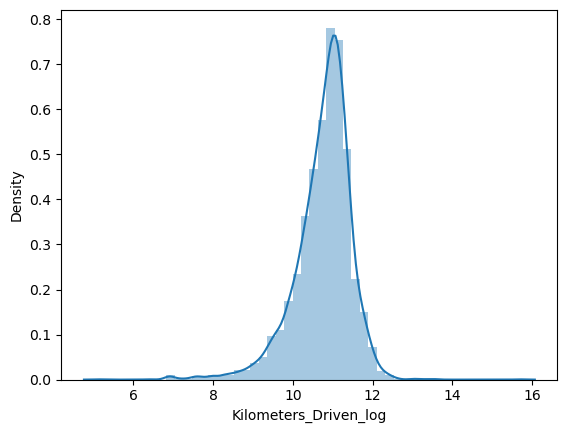

In [67]:
#Log transformation of the feature 'Kilometers_Driven'


sns.distplot(df_cars["Kilometers_Driven_log"], axlabel="Kilometers_Driven_log");

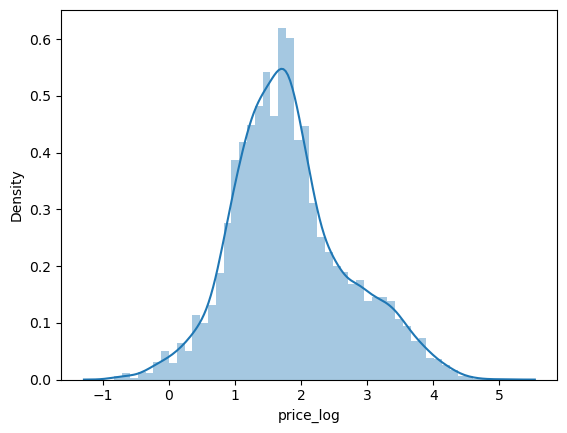

In [68]:
sns.distplot(df_cars["Price_log"], axlabel="price_log");

### Bivariate Analysis

<Figure size 1300x1700 with 0 Axes>

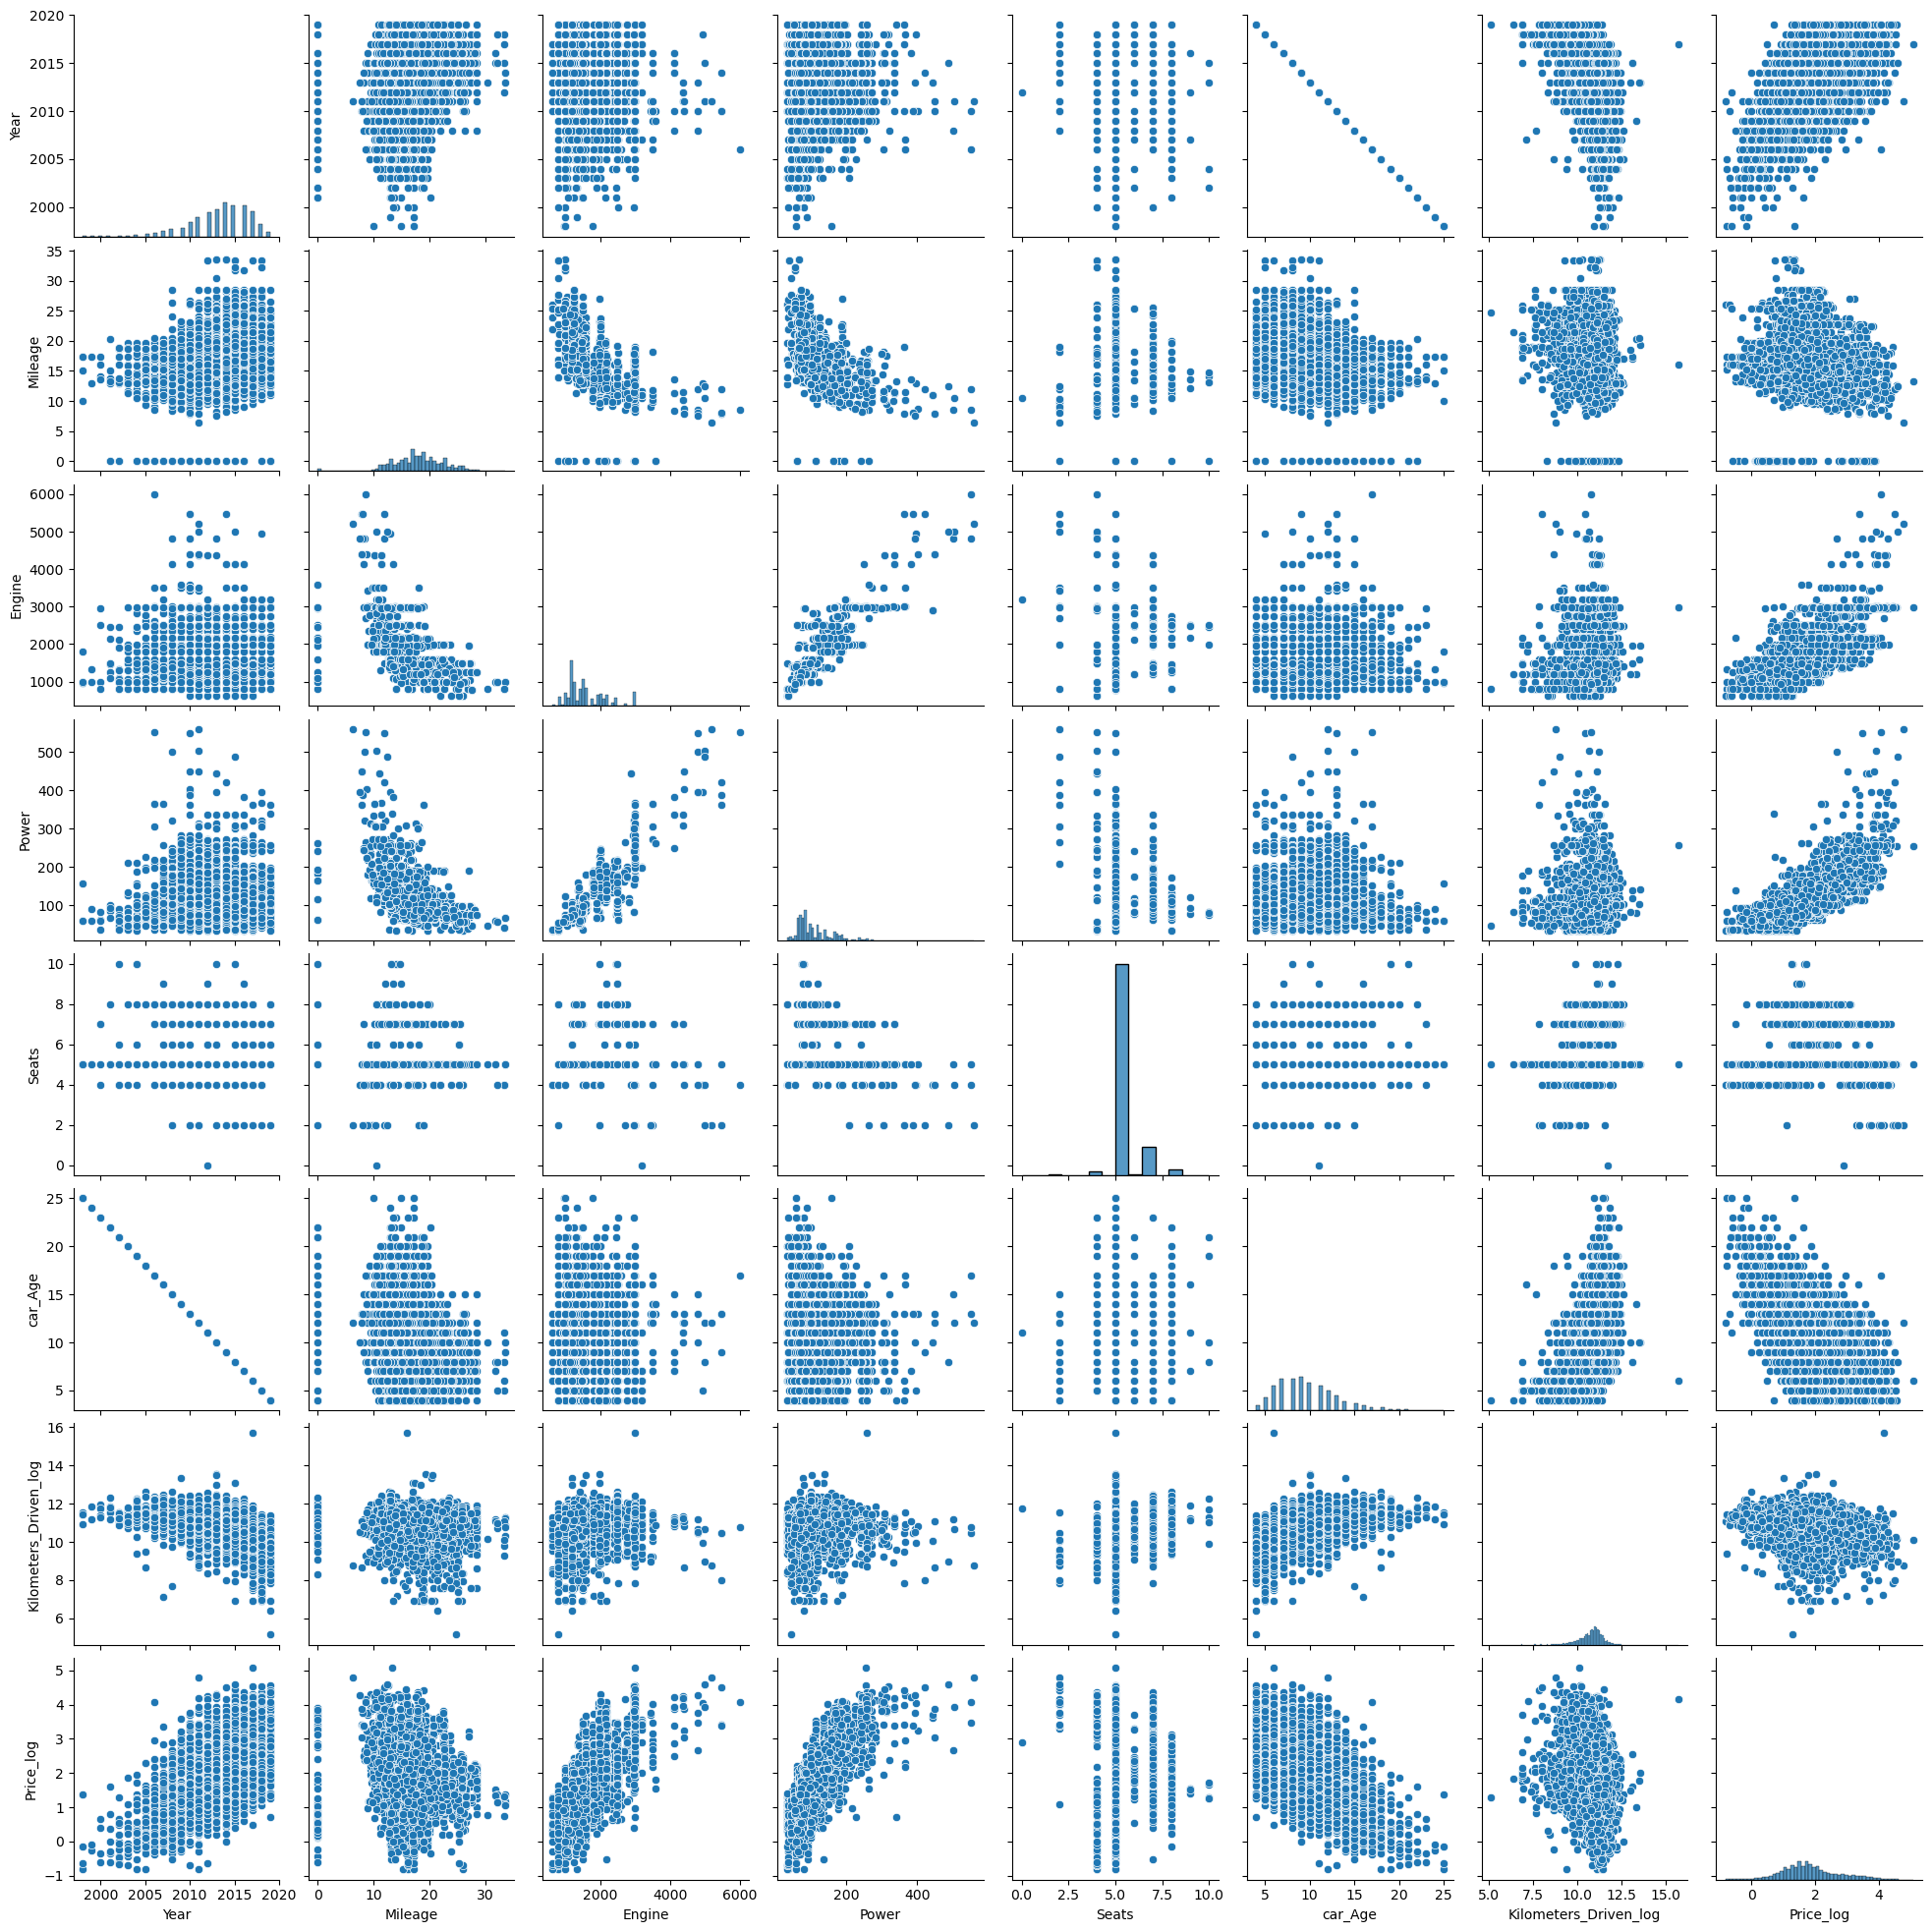

In [69]:
plt.figure(figsize=(13,17))
sns.pairplot(data=df_cars.drop(['Kilometers_Driven','Price'],axis=1))
plt.show()

###### A bar plot can be used to show the relationship between Categorical variables and continuous variables 

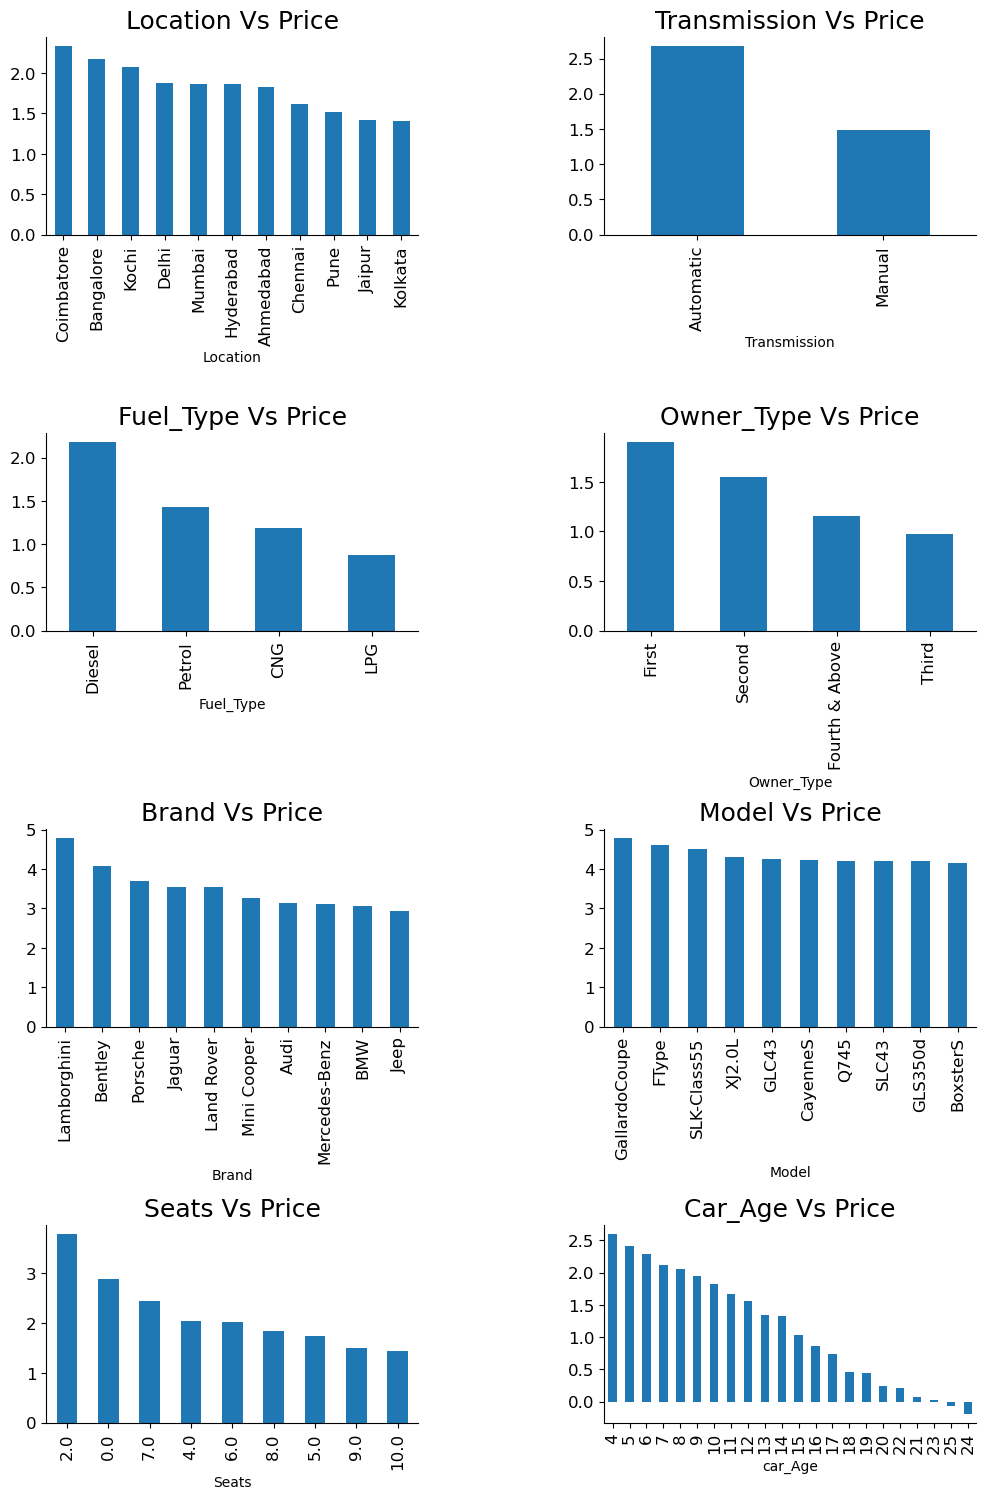

In [81]:
fig, axarr = plt.subplots(4, 2, figsize=(12, 18))
df_cars.groupby('Location')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Location Vs Price", fontsize=18)
df_cars.groupby('Transmission')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("Transmission Vs Price", fontsize=18)
df_cars.groupby('Fuel_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("Fuel_Type Vs Price", fontsize=18)
df_cars.groupby('Owner_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("Owner_Type Vs Price", fontsize=18)
df_cars.groupby('Brand')['Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][0].set_title("Brand Vs Price", fontsize=18)
df_cars.groupby('Model')['Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][1], fontsize=12)
axarr[2][1].set_title("Model Vs Price", fontsize=18)
df_cars.groupby('Seats')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][0], fontsize=12)
axarr[3][0].set_title("Seats Vs Price", fontsize=18)
df_cars.groupby('car_Age')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][1], fontsize=12)
axarr[3][1].set_title("Car_Age Vs Price", fontsize=18)
plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

#### Multivariate Analysis

In [82]:
## A heat map is widely been used for Multivariate Analysis

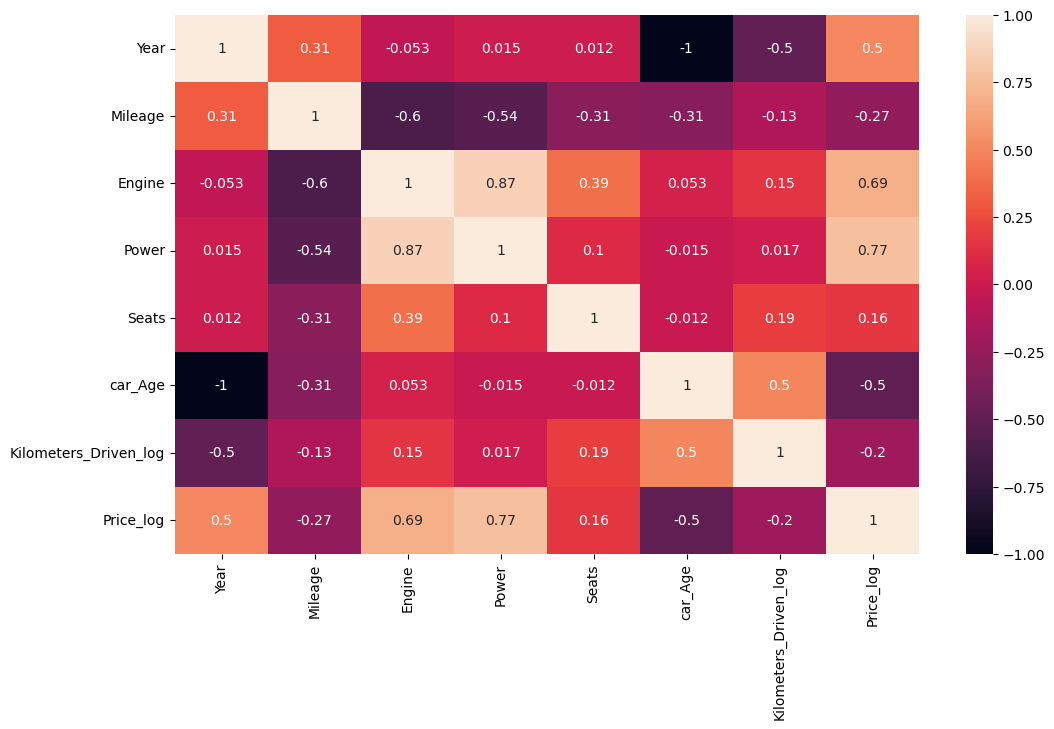

In [84]:
plt.figure(figsize=(12, 7))
sns.heatmap(df_cars.drop(['Kilometers_Driven','Price'],axis=1).corr(), annot = True)
plt.show()